**Import Libraries & Dataset**

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the sales data
sales_data = pd.read_csv('turtle_sales.csv')

**1. How customers accumulate loyalty points:**

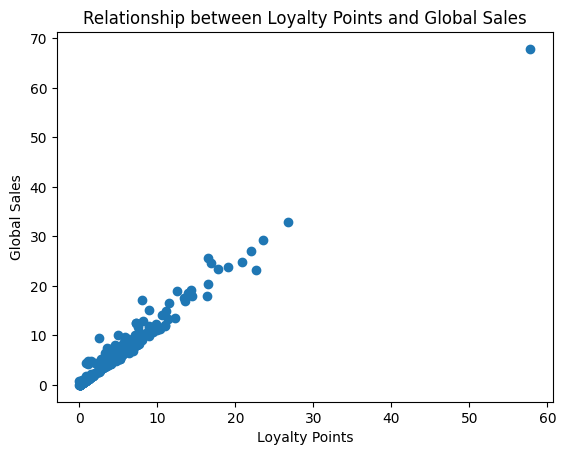

In [55]:
# Assuming loyalty points are influenced by sales data
loyalty_points = sales_data['na_sales'] + sales_data['eu_sales']

# Visualize the relationship between sales and loyalty points
import matplotlib.pyplot as plt

plt.scatter(loyalty_points, sales_data['global_sales'])
plt.xlabel('Loyalty Points')
plt.ylabel('Global Sales')
plt.title('Relationship between Loyalty Points and Global Sales')
plt.show()


**2. How groups within the customer base can be used to target specific market segments:**

In [56]:
# Load the reviews data (assuming 'loyalty_points' is in this dataset)
reviews_data = pd.read_csv('turtle_reviews.csv')

# Merge the relevant columns from both datasets based on a common identifier (e.g., 'Product' or 'Platform')
# For example, if 'Product' is the common identifier:
merged_data = sales_data.merge(reviews_data[['product', 'loyalty_points']], on='product', how='inner')

# Prepare features and target variable
X = merged_data[['na_sales', 'eu_sales']]
y = merged_data['loyalty_points']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, predictions)

# Print accuracy and MSE
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')


Accuracy: -0.014827647171926417
Mean Squared Error: 1515392.2982083715


**3. How social data (e.g. customer reviews) can be used to inform marketing campaigns:**

[1 1 1 ... 2 0 0]


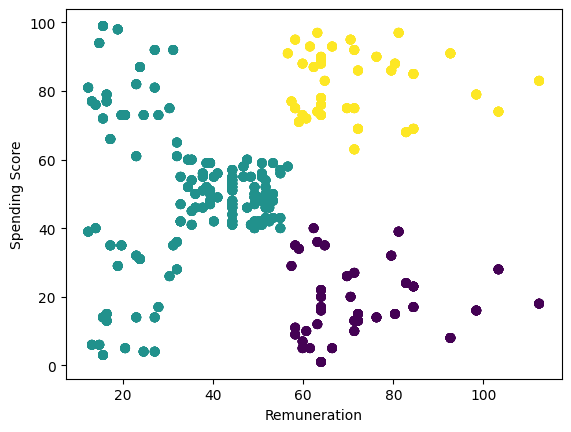

In [57]:
from sklearn.cluster import KMeans

# Load the reviews data
reviews_data = pd.read_csv('turtle_reviews.csv')

# Prepare data for clustering (use 'remuneration' and 'spending_score' columns)
X = reviews_data[['remuneration', 'spending_score']]

# Apply k-means clustering with explicit n_init value
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # You can adjust the value of n_init as needed
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
reviews_data['cluster'] = clusters

# Explore clusters and analyze customer segments
cluster_0 = reviews_data[reviews_data['cluster'] == 0]
cluster_1 = reviews_data[reviews_data['cluster'] == 1]
cluster_2 = reviews_data[reviews_data['cluster'] == 2]

print(clusters)

import matplotlib.pyplot as plt

plt.scatter(X['remuneration'], X['spending_score'], c=clusters, cmap='viridis')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Try different values for n_clusters


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)



**4. Analyzing Customer Sentiments with NLP:**

In [58]:
from textblob import TextBlob

# Load the reviews data
reviews_data = pd.read_csv('turtle_reviews.csv')

# Extract review text for NLP analysis
reviews = reviews_data['review']

# Perform text cleaning, tokenization, and other NLP tasks as needed
# ...

# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the review
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis to each review
reviews_data['sentiment'] = reviews.apply(get_sentiment)

# Display most common words
print("Most Common Words:")
print(Counter(word_frequencies).most_common(15))

# Analyze positive and negative reviews
positive_reviews = reviews_data[reviews_data['sentiment'] == 'positive']['review']
negative_reviews = reviews_data[reviews_data['sentiment'] == 'negative']['review']

# Display top 5 positive and negative reviews
print("\nTop 5 Positive Reviews:")
print(positive_reviews.head())

print("\nTop 5 Negative Reviews:")
print(negative_reviews.head())






Most Common Words:
[('the', 5464), ('and', 3253), ('to', 3171), ('of', 2499), ('it', 2496), ('is', 1783), ('this', 1781), ('game', 1713), ('for', 1550), ('you', 1318), ('with', 1265), ('in', 1157), ('that', 1107), ('my', 973), ('are', 948)]

Top 5 Positive Reviews:
1    An Open Letter to GaleForce9*:\n\nYour unpaint...
2    Nice art, nice printing.  Why two panels are f...
3    Amazing buy! Bought it as a gift for our new d...
6    I have bought many gm screens over the years, ...
7                           Came in perfect condition.
Name: review, dtype: object

Top 5 Negative Reviews:
0     When it comes to a DM's screen, the space on t...
4     As my review of GF9's previous screens these w...
13    This is one of the worst games I have ever pla...
14    It sounded like a really amazing concept, but ...
15                          Very fun game for my family
Name: review, dtype: object


**5. The impact that each product has on sales:**

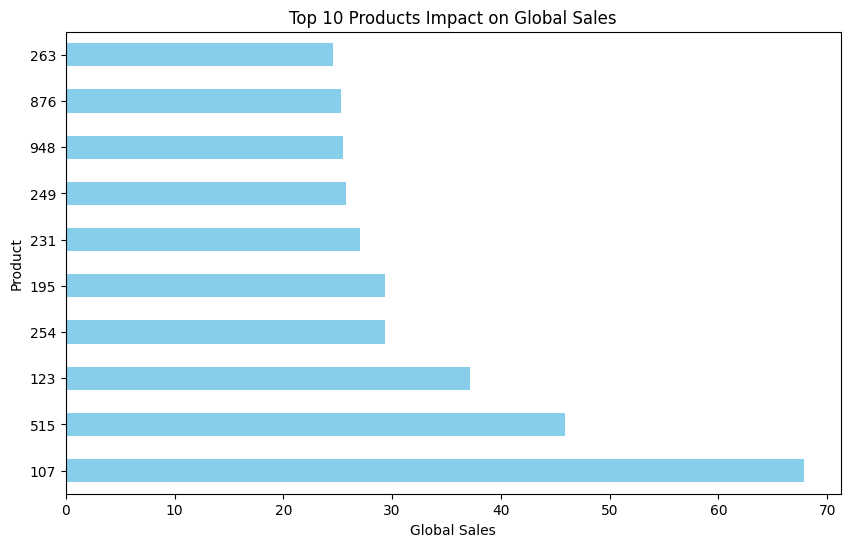

In [61]:
# Calculate total sales for each product and select the top 10 products
top_10_products = sales_data.groupby('product')['global_sales'].sum().nlargest(10)

# Visualize the impact of the top 10 products on sales (horizontal bar chart)
top_10_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Global Sales')
plt.ylabel('Product')
plt.title('Top 10 Products Impact on Global Sales')
plt.show()



**6. How reliable the data is (e.g. normal distribution, skewness, or kurtosis):**

Global Sales data is not normally distributed


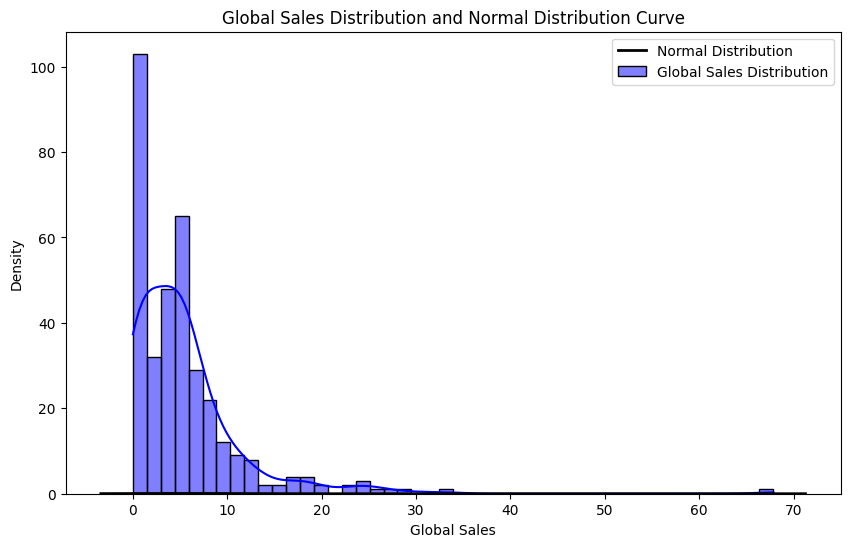

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm

# Perform Shapiro-Wilk test for normality
stat, p = shapiro(sales_data['global_sales'])

# Check the results
if p > 0.05:
    print("Global Sales data is normally distributed")
else:
    print("Global Sales data is not normally distributed")

# Plotting the histogram and normal distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['global_sales'], kde=True, color='blue', label='Global Sales Distribution')
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.title('Global Sales Distribution and Normal Distribution Curve')

# Overlay a normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, sales_data['global_sales'].mean(), sales_data['global_sales'].std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.legend()
plt.show()


**7. What the relationship(s) is/are (if any) between North American, European, and global sales?**

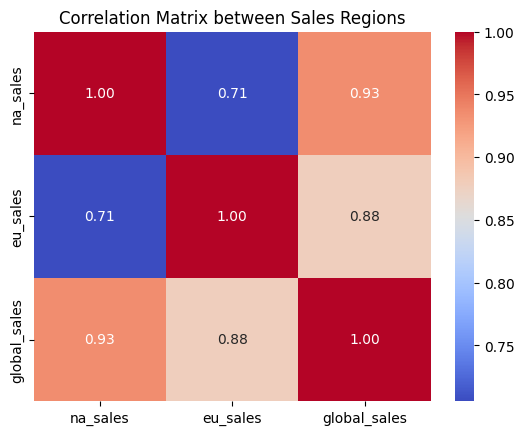

In [67]:
# Analyze the relationship between different sales regions
correlation_matrix = sales_data[['na_sales', 'eu_sales', 'global_sales']].corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Sales Regions')
plt.show()
